<a href="https://colab.research.google.com/github/Lotfullah21/Algorithms_AI/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf

In [4]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar100.load_data()

169001437/169001437 [==============================] - 2s 0us/step


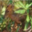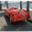

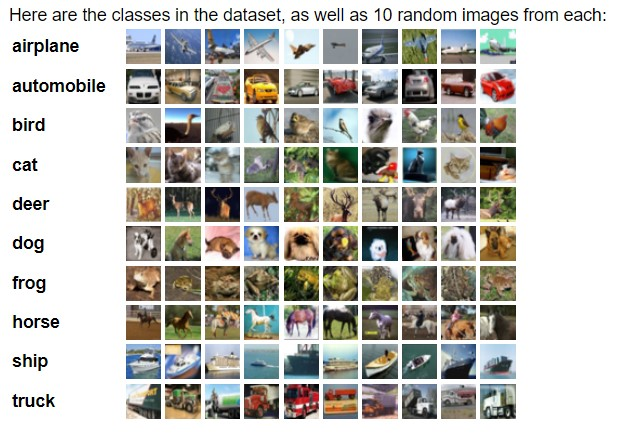

https://www.cs.toronto.edu/~kriz/cifar.html

In [5]:
train_x.shape
train_x.shape[0]
train_x.shape[1]
train_x.shape[2]

32

In [6]:
Xtr_rows = train_x.reshape(train_x.shape[0],32*32*3)

In [20]:
import numpy as np

class Kneighbors(object):
  def __init__(self):
    pass
  
  def train(self,x,y):
    # as we can see the training part is just O(1) in terms of complexity, because here jsut we are saving the data,but during testing it is O(n)
    # which means we computing the differences between our test image and all training data and pick the one which gives the lowes value.
    self.Xtr = x
    self.ytr = y
  def predict(self,x,k):
    num_test = x.shape[0]
    y_pred = np.zeros(num_test, dtype = self.ytr.dtype)

    for i in range(num_test):
      # find the nearest training example for our test data, we use L1 distance to calculate the difference between pixels
      # distance_l2 = np.sqrt(np.sum(np.square(self.Xtr - x[i,:]), axis = 1))
      distance_l1 = np.sum(np.abs(self.Xtr-x[i,:]),axis = 1)
      min_distance = np.argmin(distance_l1)
      y_pred[i] = self.ytr[min_distance]
    return y_pred


In [21]:
Xtr = train_x.reshape(train_x.shape[0],32*32*3)
Xte = test_x.reshape(test_x.shape[0],32*32*3)

In [22]:
nn = Kneighbors()
nn.train(Xtr,train_y)

In [12]:
# pred = nn.predict(Xte)

### Standard package
here we can also directly import the KNeighborsClassifier from sklearn, we have different kind of knn, some of them are faster than the conventional Knn.

In [18]:

X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
print(neigh.predict([[1.1]]))


print(neigh.predict_proba([[0.9]]))


[0]
[[0.66666667 0.33333333]]


### Evaluating the model
we can seperate a chunk of our training as validation set,so that we can use that later as a fake test data during training our model.

if we have more computational power we can use k fold cross validation, where we divide our data into k folds

In [19]:
# Xtr is a 50000x3072 matrix
Xtr_val = Xtr[:1000,:]
Ytr_val = train_y[:1000]

Xtr_new = Xtr[1000:,:]
Ytr_new = train_y[1000:]

Validation_accuracy = []


In [15]:
# for k in [1,3,5,10,20,50,100]:
#   nn = KNN()
#   nn.train(Xtr_new,Ytr_new)
#   # Y_val_predict = nn.predict(Xtr_val,k=k)
#   acc = np.mean(Y_val_predict == Ytr_val)
#   print ('accuracy: %f' %(acc,))
#   Validation_accuracy.append((k,acc))